In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
data = pd.read_csv("housing_data.csv")  # Replace with your actual CSV file
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
print(data.head())
print(data.isnull().sum())



   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64


In [4]:
X = data.iloc[:, :-1] 
y = data.iloc[:, -1]  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [5]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [6]:
print(f"Mean Squared Error (Train Data): {mse_train}")
print(f"Mean Squared Error (Test Data): {mse_test}")
print(f"R² Score (Train Data): {r2_train}")
print(f"R² Score (Test Data): {r2_test}")

Mean Squared Error (Train Data): 0.5179331255246699
Mean Squared Error (Test Data): 0.5558915986952442
R² Score (Train Data): 0.6125511913966952
R² Score (Test Data): 0.575787706032451


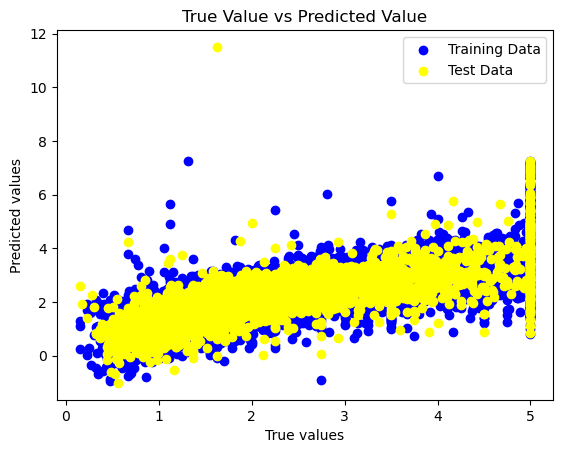

In [7]:
plt.scatter(y_train, y_train_pred, color='blue', label='Training Data')
plt.scatter(y_test, y_test_pred, color='yellow', label='Test Data')
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("True Value vs Predicted Value")
plt.legend()
plt.show()

In [8]:
x=np.array([95,85,80,70,60])
y=np.array([85,95,70,65,70])

model = np.polyfit(x, y, 1)
model

array([ 0.64383562, 26.78082192])

In [10]:
predict = np.poly1d(model)
predict(65)

68.63013698630137

In [11]:
y_pred= predict(x)
y_pred


array([87.94520548, 81.50684932, 78.28767123, 71.84931507, 65.4109589 ])

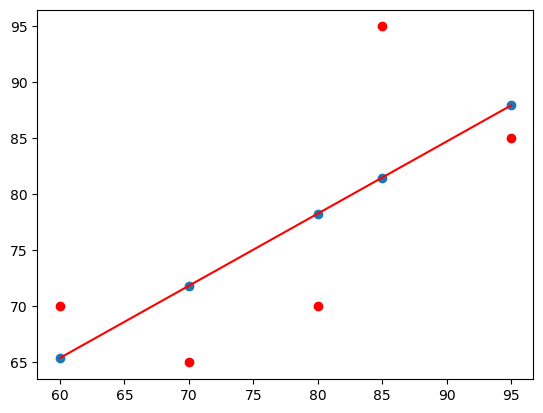

In [12]:
y_line = model[1] + model[0]* x
plt.plot(x,y_line, c= 'r')
plt.scatter(x,y_pred)
plt.scatter(x,y,c='r')